# Data Driven Competitions: https://www.drivendata.org/competitions/


## On this challenge we predicting blood donations using various machine learning algorithms

In [2]:
import numpy as np
import pandas as pd

## A blood van comes to the campus every 3 months. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

In [3]:
blood_data = pd.read_csv("transfusion.data")

In [4]:
blood_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
blood_data_cols = blood_data.columns.tolist()
features = blood_data[blood_data_cols[0:-1]] # the features we will use to train the set
target = blood_data[blood_data_cols[-1]]

## Inspecting how the target variable is correlated with the various features:

In [6]:
blood_data.corr()[blood_data_cols[-1]]

Recency (months)                             -0.279869
Frequency (times)                             0.218633
Monetary (c.c. blood)                         0.218633
Time (months)                                -0.035854
whether he/she donated blood in March 2007    1.000000
Name: whether he/she donated blood in March 2007, dtype: float64

In [7]:
y = np.array(target.tolist()) # this is out target column

In [8]:
y = blood_data["whether he/she donated blood in March 2007"].values # this is out target column
# We could also do y = np.array(target.tolist())

# Here we transform the data from a dataframe to numpy arrays
X = (blood_data[:].values)[:,:-1]

In [9]:
X.shape

(748, 4)

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
[type(X),type(y),len(X),len(y)] # just checking that everything is in order :-)

[numpy.ndarray, numpy.ndarray, 748, 748]

## Here we split the samples into training and test sets

In [12]:

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0) 

## Let's rescale the feature values so that all parameters are of comparable size

In [13]:
from sklearn import preprocessing
stdsc = preprocessing.StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
#X_train_minmax
X_test_minmax = min_max_scaler.fit_transform(X_test)
#X_test_minmax

/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Logistic Regression

In [15]:
#X_train_std = np.zeros((len(X_train),4))
#X_test_std = np.zeros((len(X_test),4))

#for col in range(4):
#    X_train_std[:,col] = (X_train[:,col]-X_train[:,col].mean())/X_train[:,col].std()
#    X_test_std[:,col] = (X_test[:,col]-X_test[:,col].mean())/X_test[:,col].std()

In [16]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10,random_state = 0,penalty = 'l2',) # C = 1/lambda where lambda is the regularization scale - penalty for very large weights
lr.fit(X_train_std,y_train)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))
 
print('Training accuracy std:', lr.score(X_train_std, y_train))
print('Test accuracy std:', lr.score(X_test_std, y_test))


lr = LogisticRegression(C=1,random_state = 0,penalty = 'l2',) # C = 1/lambda where lambda is the regularization scale - penalty for very large weights
lr.fit(X_train_minmax,y_train)

X_combined_minmax = np.vstack((X_train_minmax,X_test_minmax))
y_combined = np.hstack((y_train, y_test))
 
print('Training accuracy normalized:', lr.score(X_train_minmax, y_train))
print('Test accuracy normalized:', lr.score(X_test_minmax, y_test))


        

Training accuracy std: 0.782026768642
Test accuracy std: 0.742222222222
Training accuracy normalized: 0.780114722753
Test accuracy normalized: 0.751111111111


In [17]:
error = lr.predict(X_combined_std)- y_combined
len(error[error!=0])

284

In [18]:
lr.coef_

array([[-2.96487974,  1.61840377,  1.61840377, -1.34675987]])

## Using support vector machines

In [19]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state=0) 

# Let's rescale the features so that all parameters are of comparable size
# This can be done in an easier way using the sklearn StandardScaler class

X_train_std = np.zeros((len(X_train),4))
X_test_std = np.zeros((len(X_test),4))

for col in range(4):
    X_train_std[:,col] = (X_train[:,col]-X_train[:,col].mean())/X_train[:,col].std()
    X_test_std[:,col] = (X_test[:,col]-X_test[:,col].mean())/X_test[:,col].std()


## Logistic Regression



svm = SVC(kernel='rbf', random_state=0, gamma=100,C=1.0)
svm.fit(X_train_std,y_train)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))
        
error = svm.predict(X_combined_std) - y_combined
error_train = svm.predict(X_train_std) - y_train
error_test = svm.predict(X_test_std) - y_test
misclassifications_num =len(error[error!=0])
misclassifications_num_train =len(error_train[error_train!=0])
misclassifications_num_test =len(error_test[error_test!=0])
accuracy = round((1-misclassifications_num/len(y_combined))*100,2)
accuracy_train = round((1-misclassifications_num_train/len(y_train))*100,2)
accuracy_test = round((1-misclassifications_num_test/len(y_test))*100,2)
print("combined: %.2f" %  accuracy)
#print(misclassifications_num)
print("accuracy on train set:  %.2f" %  accuracy_train)
print("accuracy on test set:  %.2f" %  accuracy_test)
#print(misclassifications_num_train)

combined: 84.09
accuracy on train set:  89.73
accuracy on test set:  75.67


## Try KNN 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier() # metric='minkowski', p=2, n_neighbors=5, algorithm='auto' all default
knn.fit(X_train_std,y_train)
error = knn.predict(X_combined_std) - y_combined
error_train = knn.predict(X_train_std) - y_train
error_test = knn.predict(X_test_std) - y_test

print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

#misclassifications_num =len(error[error!=0])
#misclassifications_num_train =len(error_train[error_train!=0])
#misclassifications_num_test =len(error_test[error_test!=0])
#accuracy = round((1-misclassifications_num/len(y_combined))*100,2)
#accuracy_train = round((1-misclassifications_num_train/len(y_train))*100,2)
#accuracy_test = round((1-misclassifications_num_test/len(y_test))*100,2)
#print("combined: %.2f" %  accuracy)
#print(misclassifications_num)
#print("accuracy on train set:  %.2f" %  accuracy_train)
#print("accuracy on test set:  %.2f" %  accuracy_test)
#print(misclassifications_num_train)

Training accuracy: 0.792410714286
Test accuracy: 0.733333333333


# Let's do some exploratory data analysis

In [28]:
import matplotlib.pyplot as plt

In [29]:
def plot_pairwise(f1, f2, X, y):
    outcome_1 = np.unique(y)[0]
    outcome_2 = np.unique(y)[1]
    plt.scatter(X[y == outcome_1,f1],X[y == outcome_1,f2], c = 'r', marker = 'x',label='Donated')
    plt.scatter(X[y == outcome_2,f1],X[y == outcome_2,f2], c = 'b', marker = 'x',label="Didn't donate")
    plt.xlabel(blood_data_cols[f1])
    plt.ylabel(blood_data_cols[f2])
    plt.legend()
    plt.show()
    

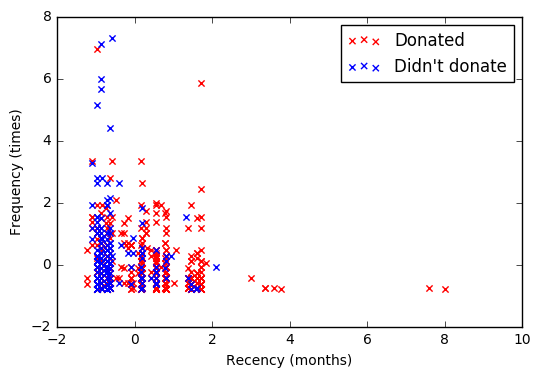

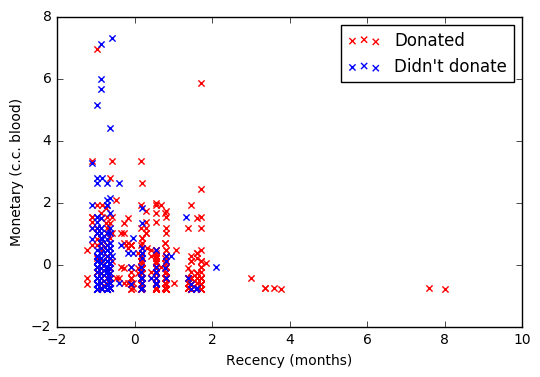

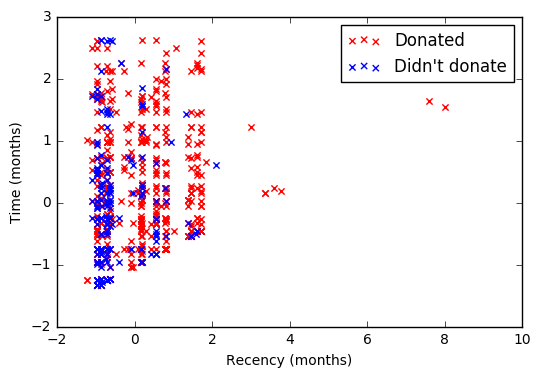

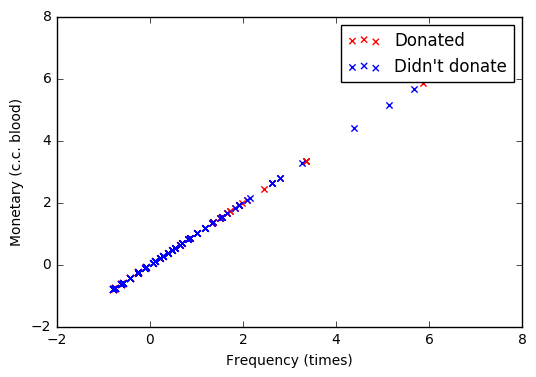

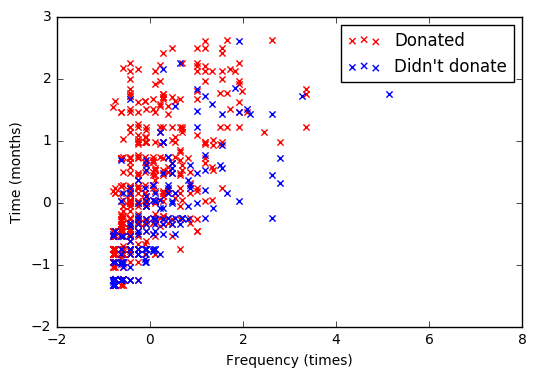

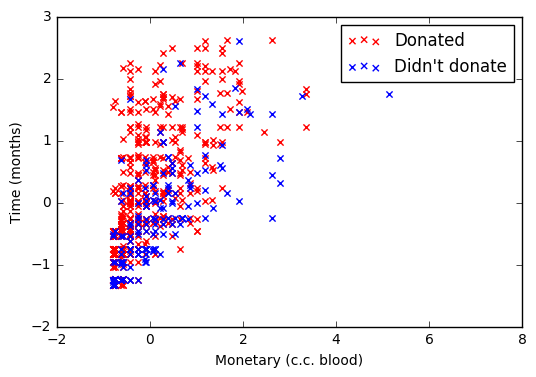

In [30]:
for i in range(3):  # 12 13 14 23 24 34
    for j in range(i+1,4):
        plot_pairwise(i,j,X_combined_std,y_combined)

## Decision trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
tree.fit(X_train_std,y_train)

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))

print('Training accuracy:', tree.score(X_train_std, y_train))
print('Test accuracy:', tree.score(X_test_std, y_test))

Training accuracy: 0.805803571429
Test accuracy: 0.806666666667


## Random forests

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)
stdsc = preprocessing.StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

forest = RandomForestClassifier(criterion='entropy', random_state=1, n_estimators=70)
forest.fit(X_train_std,y_train)

X_combined = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train, y_test))

print('Training accuracy:', forest.score(X_train_std, y_train))
print('Test accuracy:', forest.score(X_test_std, y_test)) # overfitting

Training accuracy: 0.940726577438
Test accuracy: 0.72


/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/brenda/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
